# Importing Libraries

In [ ]:
import os
import shutil
import random
import tensorflow
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, Input, BatchNormalization

# Fetching The Data from Drive

In [ ]:
dataset_path = r"/content/drive/MyDrive/DL_PROJECT/Bird Speciees Dataset"
if os.path.exists(dataset_path):
    print("Dataset found")
    print("Dataset folders:", os.listdir(dataset_path))
else:
    print("Dataset not found")

Dataset found
Dataset folders: ['AMERICAN GOLDFINCH', 'FLAMINGO', 'CARMINE BEE-EATER', 'EMPEROR PENGUIN', 'DOWNY WOODPECKER', 'BARN OWL']


In [ ]:
# Define paths for train, validation, and test sets
train_path = r"/content/drive/MyDrive/DL_PROJECT/train"
val_path = r"/content/drive/MyDrive/DL_PROJECT/val"
test_path = r"/content/drive/MyDrive/DL_PROJECT/test"

In [ ]:
# Define paths for train, validation, and test sets
train_path = r"/content/drive/MyDrive/DL_PROJECT/train"
val_path = r"/content/drive/MyDrive/DL_PROJECT/val"
test_path = r"/content/drive/MyDrive/DL_PROJECT/test"

# Create directories if they don't exist
os.makedirs(train_path, exist_ok=True)
os.makedirs(val_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

# Define split ratios
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# List all class directories
classes = [cls for cls in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, cls))]

for cls in classes:
    cls_path = os.path.join(dataset_path, cls)

    # List all image files (filter out non-image files if needed)
    images = [img for img in os.listdir(cls_path) if img.lower().endswith(('.jpg', '.jpeg', '.png'))]

    if not images:
        continue  # Skip if no valid images

    # Shuffle images
    random.shuffle(images)

    # Calculate split indices
    total_images = len(images)
    train_idx = int(total_images * train_ratio)
    val_idx = train_idx + int(total_images * val_ratio)

    # Split images
    train_images = images[:train_idx]
    val_images = images[train_idx:val_idx]
    test_images = images[val_idx:]

    # Create class subdirectories in train, val, and test
    os.makedirs(os.path.join(train_path, cls), exist_ok=True)
    os.makedirs(os.path.join(val_path, cls), exist_ok=True)
    os.makedirs(os.path.join(test_path, cls), exist_ok=True)

    # Move images to respective directories
    for img in train_images:
        shutil.copy(os.path.join(cls_path, img), os.path.join(train_path, cls, img))
    for img in val_images:
        shutil.copy(os.path.join(cls_path, img), os.path.join(val_path, cls, img))
    for img in test_images:
        shutil.copy(os.path.join(cls_path, img), os.path.join(test_path, cls, img))

print("Data split successfully!")

Data split successfully!


# Model Building and finetuning

In [ ]:
train_dir = r"/content/drive/MyDrive/DL_PROJECT/train"
val_dir = r"/content/drive/MyDrive/DL_PROJECT/val"
test_dir = r"/content/drive/MyDrive/DL_PROJECT/test"

# Define ImageDataGenerator with data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Define ImageDataGenerator for validation and test (only rescaling, no augmentation)
val_test_datagen = ImageDataGenerator(rescale=1.0/255)

# Load Training Data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode="categorical"
)

# Load Validation Data
val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode="categorical"
)

# Load Test Data
test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode="categorical",
    shuffle=False  # No shuffling for testing
)

Found 565 images belonging to 6 classes.
Found 118 images belonging to 6 classes.
Found 128 images belonging to 6 classes.


In [ ]:
model = Sequential()
model.add(Input(shape = (224,224,3)))
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,epochs=20,validation_data=val_generator)

Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 18s 339ms/step - accuracy: 0.2296 - loss: 1.9501 - val_accuracy: 0.5508 - val_loss: 1.3024
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 229ms/step - accuracy: 0.5449 - loss: 1.2857 - val_accuracy: 0.7119 - val_loss: 0.8554
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 272ms/step - accuracy: 0.6215 - loss: 1.0640 - val_accuracy: 0.8136 - val_loss: 0.6268
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 257ms/step - accuracy: 0.7448 - loss: 0.7491 - val_accuracy: 0.8220 - val_loss: 0.6318
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 234ms/step - accuracy: 0.7921 - loss: 0.6146 - val_accuracy: 0.8390 - val_loss: 0.4833
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 276ms/step - accuracy: 0.7644 - loss: 0.5972 - val_accuracy: 0.8559 - val_loss: 0.4562
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 245ms/step - accuracy: 0.7916 - loss: 0.6454 - val_accuracy: 0.8814 - val_loss: 0.4120
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 258ms/step - accuracy: 0.8469 - loss: 0.4692 - val_accuracy:

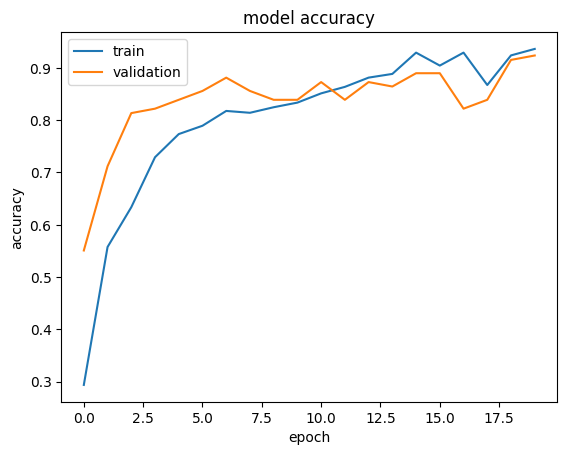

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

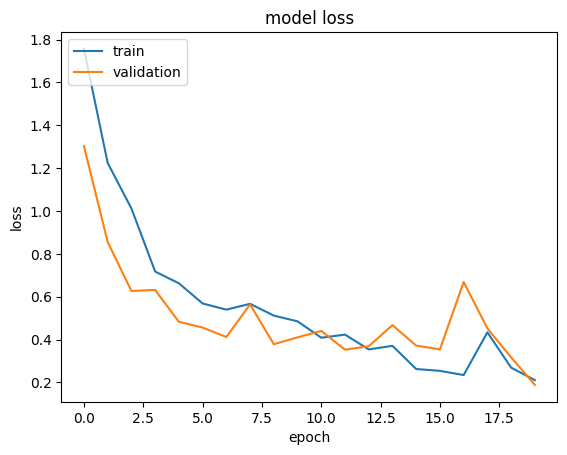

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

In [ ]:
model.save('my_best_cnn_.h5')

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,532,820 (127.92 MB)

 Trainable params: 11,177,606 (42.64 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,355,214 (85.28 MB)

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 55s 8s/step - accuracy: 0.9758 - loss: 0.0621
Test Accuracy: 0.9766
Test Loss: 0.0629


In [ ]:
from tensorflow.keras.optimizers import Adam

# Hyperparameter tuning using Optuna

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.4/383.4 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 7.5 MB/s eta 0:00:00


In [ ]:
import optuna

def objective(trial):
    model = Sequential()

    # Input Layer (Assuming 224x224 RGB images)
    input_shape = (224, 224, 3)
    model.add(Input(shape=input_shape))

    height, width = input_shape[:2]  # Track image size dynamically

    # Tune number of Conv2D layers (1 to 5)
    num_conv_layers = trial.suggest_int("num_conv_layers", 1, 5)
    for i in range(num_conv_layers):
        filters = trial.suggest_categorical(f"filters_{i}", [8, 16, 32, 64, 128, 256])

        # Ensure kernel size is valid based on current image size
        max_kernel_size = min(height, width)  # Prevent kernel larger than input
        kernel_size = trial.suggest_categorical(f"kernel_size_{i}", [3, 4, 5])
        kernel_size = min(kernel_size, max_kernel_size)  # Adjust dynamically

        activation = trial.suggest_categorical(f"conv_activation_{i}", ['relu', 'sigmoid', 'tanh'])

        model.add(Conv2D(filters=filters, kernel_size=(kernel_size, kernel_size), activation=activation, padding="same"))

        # MaxPooling layer
        pool_size = trial.suggest_categorical(f"pool_size_{i}", [2, 3, 4])
        pool_size = min(pool_size, height)  # Ensure pool size is not bigger than input
        model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

        # Update input size after pooling
        height //= pool_size
        width //= pool_size
        if height < 1 or width < 1:
            break  # Stop adding layers if input size is too small

    # Flatten before Dense layers
    model.add(Flatten())

    # Tune number of Dense layers (1 to 5)
    num_dense_layers = trial.suggest_int("num_dense_layers", 1, 5)
    for i in range(num_dense_layers):
        units = trial.suggest_categorical(f"dense_units_{i}", [8, 16, 32, 64, 128, 256])
        activation = trial.suggest_categorical(f"dense_activation_{i}", ['relu', 'sigmoid', 'tanh'])

        model.add(Dense(units=units, activation=activation))

        # Dropout after each Dense layer
        dropout_rate = trial.suggest_float(f"dropout_{i}", 0.0, 0.5, step=0.1)
        model.add(Dropout(dropout_rate))

    # Output Layer (6 classes → Softmax activation)
    model.add(Dense(6, activation='softmax'))

    # Tune learning rate for Adam optimizer
    learning_rate = trial.suggest_categorical("learning_rate", [0.001, 0.0001, 0.00001])

    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',  # For multi-class classification
                  metrics=['accuracy'])

    # Train the model and return validation accuracy
    history = model.fit(train_generator, validation_data=val_generator, epochs=10, verbose=0)

    val_accuracy = history.history['val_accuracy'][-1]
    return val_accuracy  # Optuna maximizes validation accuracy


In [ ]:
# Create Optuna Study
study = optuna.create_study(direction="maximize",study_name = '1st')  # We want to maximize accuracy

# Optimize the study with 20 trials
study.optimize(objective, n_trials=20)

# Best hyperparameters found
print("Best Hyperparameters:", study.best_params)

[I 2025-02-10 10:25:30,040] A new study created in memory with name: 1st
[I 2025-02-10 10:27:30,120] Trial 0 finished with value: 0.2881355881690979 and parameters: {'num_conv_layers': 5, 'filters_0': 256, 'kernel_size_0': 4, 'conv_activation_0': 'relu', 'pool_size_0': 3, 'filters_1': 16, 'kernel_size_1': 5, 'conv_activation_1': 'tanh', 'pool_size_1': 3, 'filters_2': 128, 'kernel_size_2': 5, 'conv_activation_2': 'tanh', 'pool_size_2': 4, 'filters_3': 256, 'kernel_size_3': 4, 'conv_activation_3': 'relu', 'pool_size_3': 4, 'filters_4': 8, 'kernel_size_4': 5, 'conv_activation_4': 'tanh', 'pool_size_4': 2, 'num_dense_layers': 4, 'dense_units_0': 256, 'dense_activation_0': 'sigmoid', 'dropout_0': 0.30000000000000004, 'dense_units_1': 32, 'dense_activation_1': 'sigmoid', 'dropout_1': 0.0, 'dense_units_2': 64, 'dense_activation_2': 'relu', 'dropout_2': 0.1, 'dense_units_3': 64, 'dense_activation_3': 'relu', 'dropout_3': 0.5, 'learning_rate': 0.0001}. Best is trial 0 with value: 0.288135588169

Best Hyperparameters: {'num_conv_layers': 3, 'filters_0': 8, 'kernel_size_0': 3, 'conv_activation_0': 'relu', 'pool_size_0': 2, 'filters_1': 64, 'kernel_size_1': 4, 'conv_activation_1': 'relu', 'pool_size_1': 4, 'filters_2': 256, 'kernel_size_2': 3, 'conv_activation_2': 'relu', 'pool_size_2': 3, 'num_dense_layers': 1, 'dense_units_0': 64, 'dense_activation_0': 'relu', 'dropout_0': 0.30000000000000004, 'learning_rate': 0.0001}


In [ ]:
best_params = study.best_params

In [ ]:
best_params

{'num_conv_layers': 3,
 'filters_0': 8,
 'kernel_size_0': 3,
 'conv_activation_0': 'relu',
 'pool_size_0': 2,
 'filters_1': 64,
 'kernel_size_1': 4,
 'conv_activation_1': 'relu',
 'pool_size_1': 4,
 'filters_2': 256,
 'kernel_size_2': 3,
 'conv_activation_2': 'relu',
 'pool_size_2': 3,
 'num_dense_layers': 1,
 'dense_units_0': 64,
 'dense_activation_0': 'relu',
 'dropout_0': 0.30000000000000004,
 'learning_rate': 0.0001}

In [ ]:
def build_best_model(best_params):
    model = Sequential()

    # Input Layer (Assuming 224x224 RGB images)
    input_shape = (224, 224, 3)
    model.add(Input(shape=input_shape))

    height, width = input_shape[:2]  # Track image size dynamically

    # Add Best Conv2D Layers
    for i in range(best_params["num_conv_layers"]):
        filters = best_params[f"filters_{i}"]
        kernel_size = best_params[f"kernel_size_{i}"]
        activation = best_params[f"conv_activation_{i}"]

        model.add(Conv2D(filters=filters, kernel_size=(kernel_size, kernel_size), activation=activation, padding="same"))

        # Add MaxPooling
        pool_size = best_params[f"pool_size_{i}"]
        model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

        # Update size
        height //= pool_size
        width //= pool_size
        if height < 1 or width < 1:
            break  # Stop adding layers if input size is too small

    # Flatten before Dense layers
    model.add(Flatten())

    # Add Best Dense Layers
    for i in range(best_params["num_dense_layers"]):
        units = best_params[f"dense_units_{i}"]
        activation = best_params[f"dense_activation_{i}"]
        dropout_rate = best_params[f"dropout_{i}"]

        model.add(Dense(units=units, activation=activation))
        model.add(Dropout(dropout_rate))

    # Output Layer for 6 Classes
    model.add(Dense(6, activation='softmax'))

    # Compile with Best Learning Rate
    learning_rate = best_params["learning_rate"]
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [ ]:
# Build the best model using the best hyperparameters
best_model = build_best_model(best_params)

# Train further on your dataset
history = best_model.fit(train_generator, validation_data=val_generator, epochs=20, verbose=1)

# Save the model if needed
best_model.save("best_cnn_model.h5")

Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 15s 329ms/step - accuracy: 0.2006 - loss: 1.7961 - val_accuracy: 0.3644 - val_loss: 1.7372
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 224ms/step - accuracy: 0.3117 - loss: 1.7123 - val_accuracy: 0.3220 - val_loss: 1.6286
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 276ms/step - accuracy: 0.3922 - loss: 1.5939 - val_accuracy: 0.5763 - val_loss: 1.4446
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 270ms/step - accuracy: 0.4900 - loss: 1.4263 - val_accuracy: 0.4831 - val_loss: 1.3327
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 224ms/step - accuracy: 0.5085 - loss: 1.3142 - val_accuracy: 0.5678 - val_loss: 1.2225
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 276ms/step - accuracy: 0.5545 - loss: 1.2061 - val_accuracy: 0.6102 - val_loss: 1.1280
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 251ms/step - accuracy: 0.5727 - loss: 1.1020 - val_accuracy: 0.6695 - val_loss: 1.0497
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 246ms/step - accuracy: 0.6003 - loss: 1.0658 - val_accuracy

# Using Pretrained Model

In [ ]:
from keras.applications.vgg16 import VGG16

In [ ]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(224,224,3)
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model

In [ ]:
for layer in conv_base.layers:
    layer.trainable = False  # Freeze base model layers

x = conv_base.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(6, activation='softmax')(x)  # 6 classes

model = Model(inputs=conv_base.input, outputs=x)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │         262,6

 Total params: 14,980,422 (57.15 MB)

 Trainable params: 265,734 (1.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    batch_size=32
)

Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 27s 505ms/step - accuracy: 0.3023 - loss: 1.8292 - val_accuracy: 0.6441 - val_loss: 1.1475
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 278ms/step - accuracy: 0.6542 - loss: 1.0796 - val_accuracy: 0.8136 - val_loss: 0.7322
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 265ms/step - accuracy: 0.8417 - loss: 0.6643 - val_accuracy: 0.8814 - val_loss: 0.5358
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 265ms/step - accuracy: 0.8474 - loss: 0.5396 - val_accuracy: 0.8814 - val_loss: 0.4417
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 289ms/step - accuracy: 0.9065 - loss: 0.3999 - val_accuracy: 0.8814 - val_loss: 0.4235
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 280ms/step - accuracy: 0.9106 - loss: 0.3520 - val_accuracy: 0.8983 - val_loss: 0.3540
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 253ms/step - accuracy: 0.9182 - loss: 0.2984 - val_accuracy: 0.9407 - val_loss: 0.3073
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 284ms/step - accuracy: 0.9251 - loss: 0.3038 - val_accur

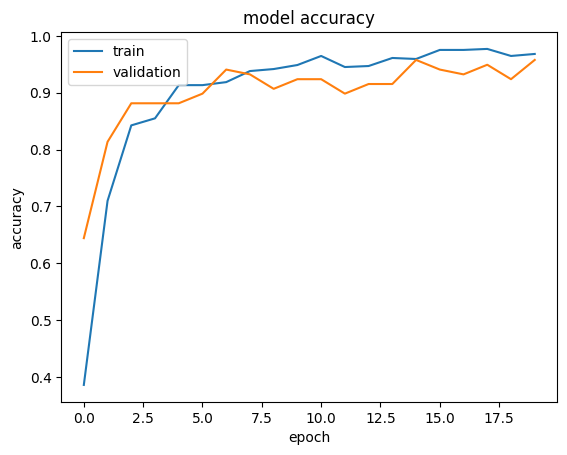

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

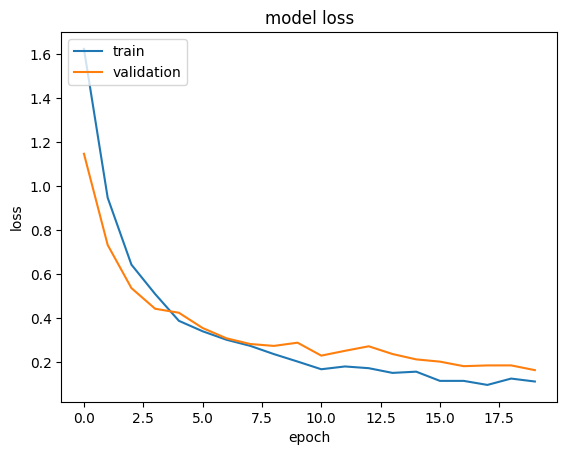

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - accuracy: 0.9605 - loss: 0.1503
Test Accuracy: 0.9844
Test Loss: 0.0879


In [ ]:
model.save('my_best_cnn_vgg16.h5')

In [ ]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(6,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,934,726 (68.42 MB)

 Trainable params: 3,220,038 (12.28 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,epochs=20,validation_data=val_generator)

Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 16s 359ms/step - accuracy: 0.2523 - loss: 2.4042 - val_accuracy: 0.5169 - val_loss: 1.2280
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 278ms/step - accuracy: 0.4842 - loss: 1.3643 - val_accuracy: 0.8051 - val_loss: 0.7601
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 272ms/step - accuracy: 0.6729 - loss: 0.8651 - val_accuracy: 0.8475 - val_loss: 0.5711
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 250ms/step - accuracy: 0.7004 - loss: 0.7479 - val_accuracy: 0.8898 - val_loss: 0.4175
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 284ms/step - accuracy: 0.7723 - loss: 0.6565 - val_accuracy: 0.9153 - val_loss: 0.3287
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 280ms/step - accuracy: 0.8229 - loss: 0.4954 - val_accuracy: 0.9068 - val_loss: 0.2873
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 250ms/step - accuracy: 0.8260 - loss: 0.4899 - val_accuracy: 0.9153 - val_loss: 0.2687
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 11s 257ms/step - accuracy: 0.8442 - loss: 0.4396 - val_accura

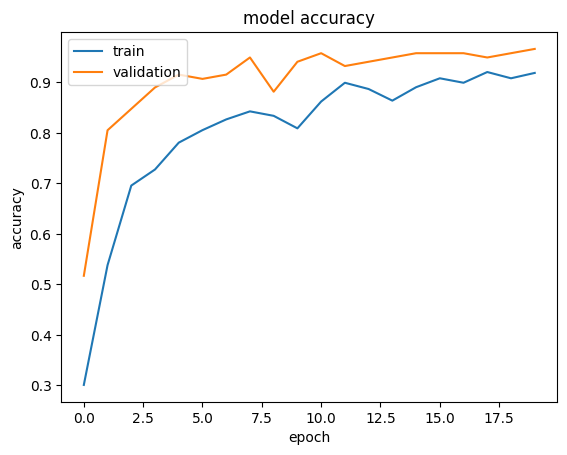

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

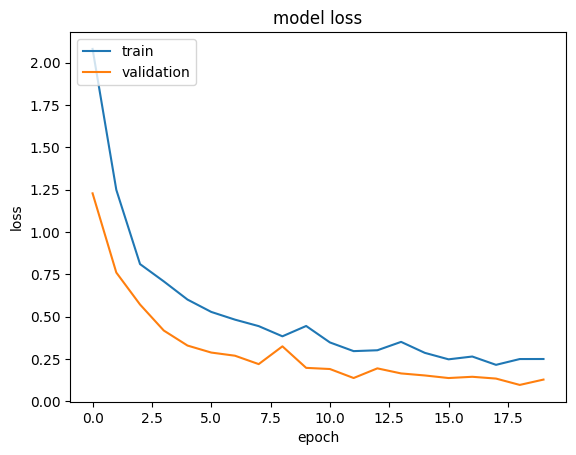

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
#